# Analysis of performance - power data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Import data
file_path = '/Users/yzamora/power/initial_combo_logs/heartbeat_0x1-1200000.log'
df = pd.read_csv(file_path, sep='\s+')
print (df.head())

   Beat  Tag            Timestamp  Global_Rate  Window_Rate  Instant_Rate  \
0     0    0  1527326949297512609     0.000000     0.000000      0.000000   
1     1    1  1527326953058903759     0.531718     0.265859      0.265859   
2     2    2  1527326956838578947     0.397822     0.265214      0.264573   
3     3    3  1527326960616173890     0.353399     0.265049      0.264719   
4     4    4  1527326964388316847     0.331328     0.265062      0.265101   

   Global_Accuracy  Window_Accuracy  Instant_Accuracy  Global_Power  \
0              1.0              1.0               1.0      0.000000   
1              1.0              1.0               1.0      0.793298   
2              1.0              1.0               1.0      0.820799   
3              1.0              1.0               1.0      0.812252   
4              1.0              1.0               1.0      0.808221   

   Window_Power  Instant_Power  
0      0.000000       0.000000  
1      0.793298       0.793298  
2      0.82

## Plotting performance vs power using HeartLogs:

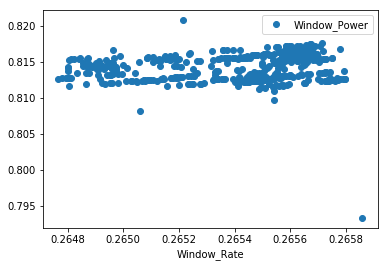

In [4]:
power = df['Window_Rate']
#removing first row, value = 0 
df = df.iloc[1:]
#print( power )
df.plot(x='Window_Rate', y='Window_Power', style='o')


## Performance vs power using STREAM.results

In [6]:
#Import Data
file_path = '/Users/yzamora/power/initial_combo_logs/STREAM.results'
df = pd.read_csv(file_path, sep='\s+')
print (df.head())

  cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
0  0xFF  2000000  3.411315  5.467605  801.392332         NaN        NaN
1  0xFF  1900000  3.411923  4.292187  628.998114         NaN        NaN
2  0xFF  1800000  3.430406  3.656366  532.934723         NaN        NaN
3  0xFF  1400000  3.434256  3.643640  530.484470         NaN        NaN
4  0xFF  1300000  3.427420  3.644682  531.694592         NaN        NaN


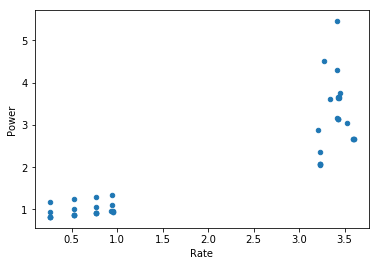

In [7]:

df.plot(x='Rate', y='Power',kind='scatter',style='o')


## Clock Speed vs Number of Cores

First Converting Hex to Binary, then getting the number of cores being used


In [8]:
cores_hex = df['cores'].tolist()
cores_bin = []
big_cores = []
lil_cores = []
total_cores = []
scale = 16 ## equals to hexadecimal
num_of_bits = 8

for i in cores_hex:
#my_hexdata = "1a" 
    bin_val = bin(int(i, scale))[2:].zfill(num_of_bits)
    ncores=0
    nlittle=0
    nbig=0
    for j in range(len(bin_val)): 
        ncores+=int(bin_val[j])
        if j<4: nbig+=int(bin_val[j])
        else: nlittle+=int(bin_val[j])
    #print(bin_val+" big, little, total: "+str(nbig)+" "+str(nlittle)+" "+str(ncores))
    cores_bin.append(bin_val)
    big_cores.append(nbig)
    lil_cores.append(nlittle)
    total_cores.append(ncores)
    
    
#print (cores_bin)
df['big_cores'] = big_cores
df['lil_cores'] = lil_cores
df['total_cores'] = total_cores

print(df.head())



  cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0  0xFF  2000000  3.411315  5.467605  801.392332         NaN        NaN   
1  0xFF  1900000  3.411923  4.292187  628.998114         NaN        NaN   
2  0xFF  1800000  3.430406  3.656366  532.934723         NaN        NaN   
3  0xFF  1400000  3.434256  3.643640  530.484470         NaN        NaN   
4  0xFF  1300000  3.427420  3.644682  531.694592         NaN        NaN   

   big_cores  lil_cores  total_cores  
0          4          4            8  
1          4          4            8  
2          4          4            8  
3          4          4            8  
4          4          4            8  


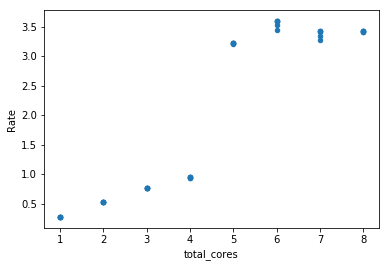

In [9]:
df.plot(x='total_cores', y='Rate',kind='scatter',style='o')

## Looking at little cores and big cores relationships

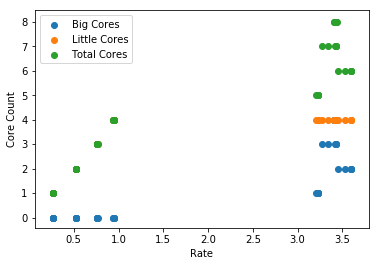

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x=(df['Rate']),y=(df['big_cores']), label='Big Cores')
ax1.scatter(x=(df['Rate']),y=(df['lil_cores']), label='Little Cores')
ax1.scatter(x=(df['Rate']),y=(df['total_cores']), label='Total Cores')
plt.legend(loc='best');
ax1.set_xlabel("Rate")
ax1.set_ylabel("Core Count")
plt.show()


In [19]:
print (df)


   cores     freq      Rate     Power       Energy  WU_PWR_AVG  WU_ENERGY  \
0   0xFF  2000000  3.411315  5.467605   801.392332         NaN        NaN   
1   0xFF  1900000  3.411923  4.292187   628.998114         NaN        NaN   
2   0xFF  1800000  3.430406  3.656366   532.934723         NaN        NaN   
3   0xFF  1400000  3.434256  3.643640   530.484470         NaN        NaN   
4   0xFF  1300000  3.427420  3.644682   531.694592         NaN        NaN   
5   0xFF  1200000  3.436005  3.652799   531.547274         NaN        NaN   
6   0x7F  2000000  3.278213  4.520206   689.431311         NaN        NaN   
7   0x7F  1900000  3.343341  3.622456   541.741917         NaN        NaN   
8   0x7F  1800000  3.428370  3.130300   456.528899         NaN        NaN   
9   0x7F  1400000  3.430004  3.129436   456.185396         NaN        NaN   
10  0x7F  1300000  3.430376  3.130472   456.286955         NaN        NaN   
11  0x7F  1200000  3.416229  3.174222   464.579766         NaN        NaN   